## Snippet: Tweedie Family Distributions CHECK KING GAMMA CRAP!! 

The **Tweedie** family of distributions is a three-parameter exponential family. 
It is used as unit distribution in GLMs.  
A variable $X \sim \mathrm{Tw}_p(\mu, \sigma^2)$ when $\mathsf E[X] = \mu$ and
$\mathsf{Var}(X) = \sigma^2 \mu^p$, $1 \le p \le 2$. $p$ is a shape parameter and $\sigma^2>0$ is a scale parameter called 
the dispersion. 

A Tweedie with $1<p<2$ is a compound Poisson distribution with gamma distributed severities. The limit when $p=1$ is an over-dispersed Poisson and when $p=2$ is a gamma. More generally: $\mathsf{Tw}_0(\mu,\sigma^2)$ is normal $(\mu, \sigma^2)$, $\mathsf{Tw}_1(\mu, \sigma^2)$ is over-dispersed Poisson $\sigma^2\mathsf{Po}(\mu/\sigma^2)$, and $\mathsf{Tw}_2(\mu,\sigma^2)$ is a gamma with CV $\sigma$.

Let $\mathsf{Ga}(\alpha, \beta)$ denote a gamma with shape $\alpha$ and scale $\beta$, with density $f(x;\alpha,\beta)=x^\alpha- e^{-x/\beta} / \beta^\alpha x\Gamma(\alpha)$. It has mean $\alpha\beta$, variance $\alpha\beta^2$, expected square $\alpha(\alpha+1)\beta$ and coefficient of variation $1/\sqrt\alpha$. We can define an alternative parameterization $\mathsf{Tw}^*(\lambda, \alpha, \beta) = \mathsf{CP}(\lambda, \mathsf(Ga(\alpha,\beta))$ 
as a compound Poisson of gammas, with expected frequency $\lambda$. 

The dictionary between the two parameterizations relies on the relation between the two shape parameters
$\alpha$ and $p$ given by
$$
\alpha = \frac{2-p}{p-1}, \qquad
p = \frac{2+\alpha}{1+\alpha}.
$$

Starting from $\mathrm{Tw}_p(\mu, \sigma^2)$
* $\lambda = \displaystyle\frac{\mu^{2-p}}{(2-p)\sigma^2}$ 
* $\beta = \displaystyle\frac{\mu^{1-p}}{(p-1)\sigma^2} = \mu /\lambda \alpha$ 

Starting from $\mathsf{Tw}^*(\lambda, \alpha, \beta)$
* $\mu = \lambda \alpha \beta$
* $\sigma^2 = \lambda  \alpha(\alpha + 1) / (\beta^2\mu^p)$ by equating expressions for the variance.

It is easy to convert from the gamma mean $m$ and CV $\nu$ to $\alpha=1/\nu^2$ and $\beta = m/\alpha$.
Remember, `scipy.stats` scale equals $\beta$.

Tweedie distributions are mixed: they have a probability mass of $p_0 =e^{-\lambda}$ at 0 and are 
continuous on $(0, \infty)$. 

Jørgensen calls $\mathsf{Tw}(\lambda, \alpha, \beta)$ the **additive** form of the model because 
$$
\sum_i \mathsf{Tw}(\lambda_i, \alpha, \beta) =  \mathsf{Tw}\left(\sum_i \lambda_i, \alpha, \beta\right).
$$ 
He calls $\mathsf{Tw}_p(\mu, \sigma)$ the **reproductive** exponential dispersion model. If $X_i\sim \mathsf{Tw}_p(\mu, \sigma/w_i)$ then
$$
\frac{1}{w}\sum_i w_i X_i \sim \mathsf{Tw}_p\left(\mu, \frac{\sigma^2}{w}\right)
$$
where $w = \sum_i w_i$. 
The weights $w_i$ represents volume in cell $i$ and $X_i$ represents the pure premium. The sum on the left
represents the total pure premium.

The `aggregate` language command `tweedie` uses reproductive parameters $\mu, p, \sigma$, since these are 
most natural for GLM modeling. The command 

```
tw1 = build('agg TW1 tweedie 2 1.05 5)
```

produces $\mathsf{Tw}_{1.05}(2, 5)$. It is converted into the additive form as inspecting the specification 
shows (default entries omitted):

```
tw1.spec

>>> {'name': 'TW1',
 'exp_en': 0.4067100332315139,
 'sev_name': 'gamma',
 'sev_a': 18.999999999999982,
 'sev_scale': 0.2588162309603446,
 'freq_name': 'poisson',
 'note': 'Tw(p=1.05, μ=2.0, σ^2=5.0) --> CP(λ=0.406710, ga(α=19, β=0.25881623), scale=0.25881623'}
```

A note is added showing the compound Poisson specification.

The helper function `tweedie_convert` is provided to translate between parameterizations.

The scale parameter $\sigma^2$ has offsetting effects: higher $\sigma^2$ results in a lower claim count, a higher gamma mean, and a more skewed aggregate distribution with a bigger mass at zero.

Tweedie distributions are a suitable  model for pure premiums. Tweedie distributions do not have a closed 
form density, but estimating the density is easy using `aggregate`. 

See the blog post [The Tweedie-Power Variance Function Family](https://www.mynl.com/blog?id=c9a74f2055686bb2c250c4fc4f627a89) for more details. 

## References

Jørgensen, Bent. 1997. The theory of dispersion models. CRC Press.


In [1]:
from aggregate import build, tweedie_convert, power_variance_family

time: 641 ms (started: 2022-10-25 20:57:31 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
# updated Oct 2022... there were errors in the old version: sev mean = alpha beta, not alpha / beta!
# tweedie_convert has been updated
# here's the proof

time: 0 ns (started: 2022-10-25 20:57:32 +01:00)


In [3]:
pd.set_option("display.float_format", lambda x: f'{x:.12g}')

time: 0 ns (started: 2022-10-25 20:57:32 +01:00)


In [4]:
# three reps, starting with the most interpretable
p = 1.005
μ = 1
σ2 = 0.1
m0 = tweedie_convert(p=p, μ=μ, σ2=σ2)

# magic numbers are
λ = μ**(2-p) / ((2-p) * σ2)
α = (2 - p) / (p - 1)
β = μ / (λ * α)
tw_cv = σ2**.5 * μ**(p/2-1)
sev_m = α *  β
sev_cv = α**-0.5

m1 = tweedie_convert(λ=λ, m=sev_m, cv=sev_cv)
m2 = tweedie_convert(λ=λ, α=α, β=β)
assert np.allclose(m0, m1, m2)
pd.concat((m0, m1, m2), axis=1)

,0,1,2
p,1.005,1.005,1.005
μ,1,1,1
σ^2,0.1,0.1,0.1
λ,10.0502512563,10.0502512563,10.0502512563
α,199,199,199
β,0.0005,0.0005,0.0005
tw_cv,0.316227766017,0.316227766017,0.316227766017
sev_m,0.0995,0.0995,0.0995
sev_cv,0.0708881205008,0.0708881205008,0.0708881205008
p0,4.31748997327e-05,4.31748997327e-05,4.31748997327e-05


time: 16 ms (started: 2022-10-25 20:57:32 +01:00)


57:32.635|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 199.00000000000426 shape from sev_cv 0.07088812050083283



agg Tw0 10.050251256281404 claims sev gamma 0.0995 cv 0.07088812050083283 poisson
agg Tw1 10.050251256281404 claims sev 0.0005 * gamma 199 poisson
agg Tw1 tweedie 1 1.005 0.1



,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,0.0995,0.0995,-7.7480244e-12,0.070888121,0.070902274,0.0001996582,0.14177628
Freq,10.050251,,,0.31543621,,,0.31543621
Agg,1,1,-9.4695363e-12,0.31622777,0.31622808,9.9837407e-07,0.3178089


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,0.0995,0.0995,-7.7469142e-12,0.070888121,0.070902274,0.0001996582,0.14177628
Freq,10.050251,,,0.31543621,,,0.31543621
Agg,1,1,-9.4709796e-12,0.31622777,0.31622808,9.9837406e-07,0.3178089


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,0.0995,0.0995,-7.7465812e-12,0.070888121,0.070902274,0.0001996582,0.14177628
Freq,10.050251,,,0.31543621,,,0.31543621
Agg,1,1,-9.4688701e-12,0.31622777,0.31622808,9.9837407e-07,0.3178089


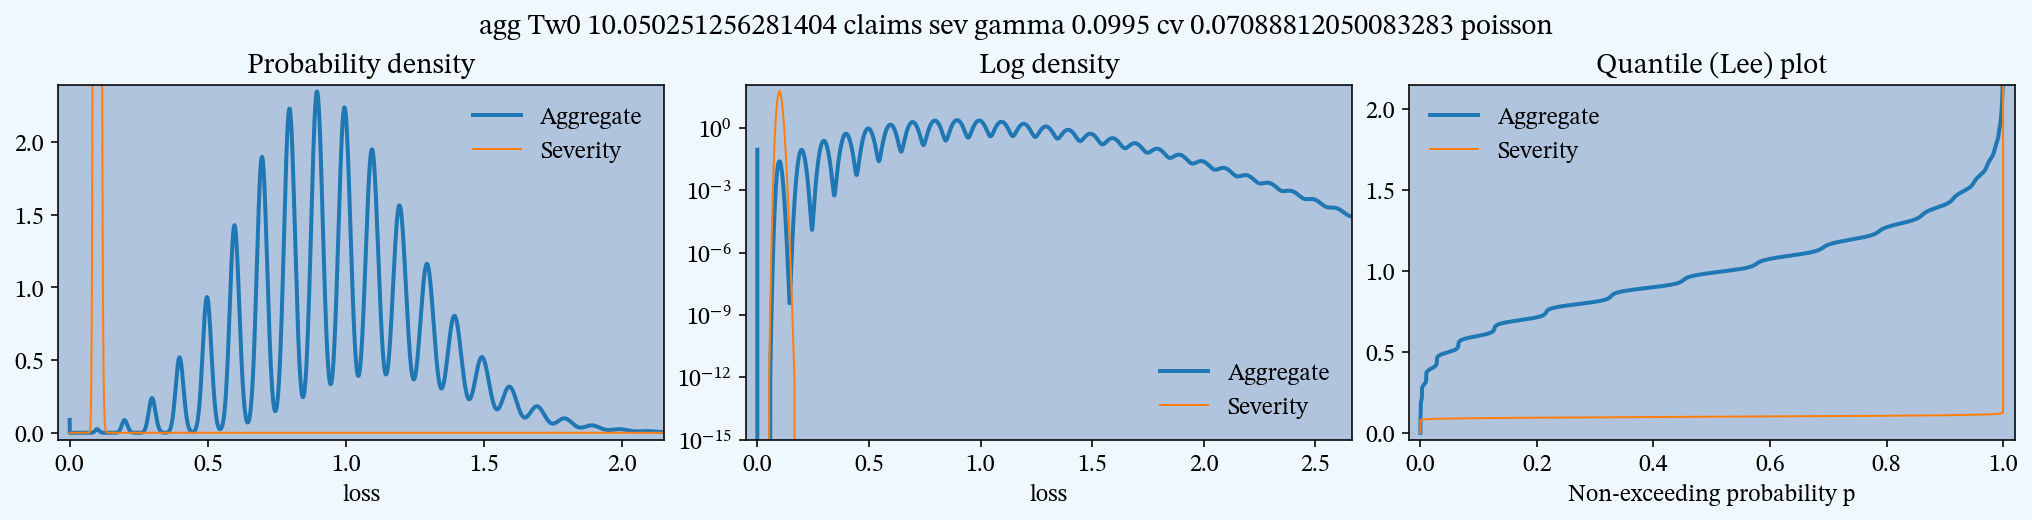

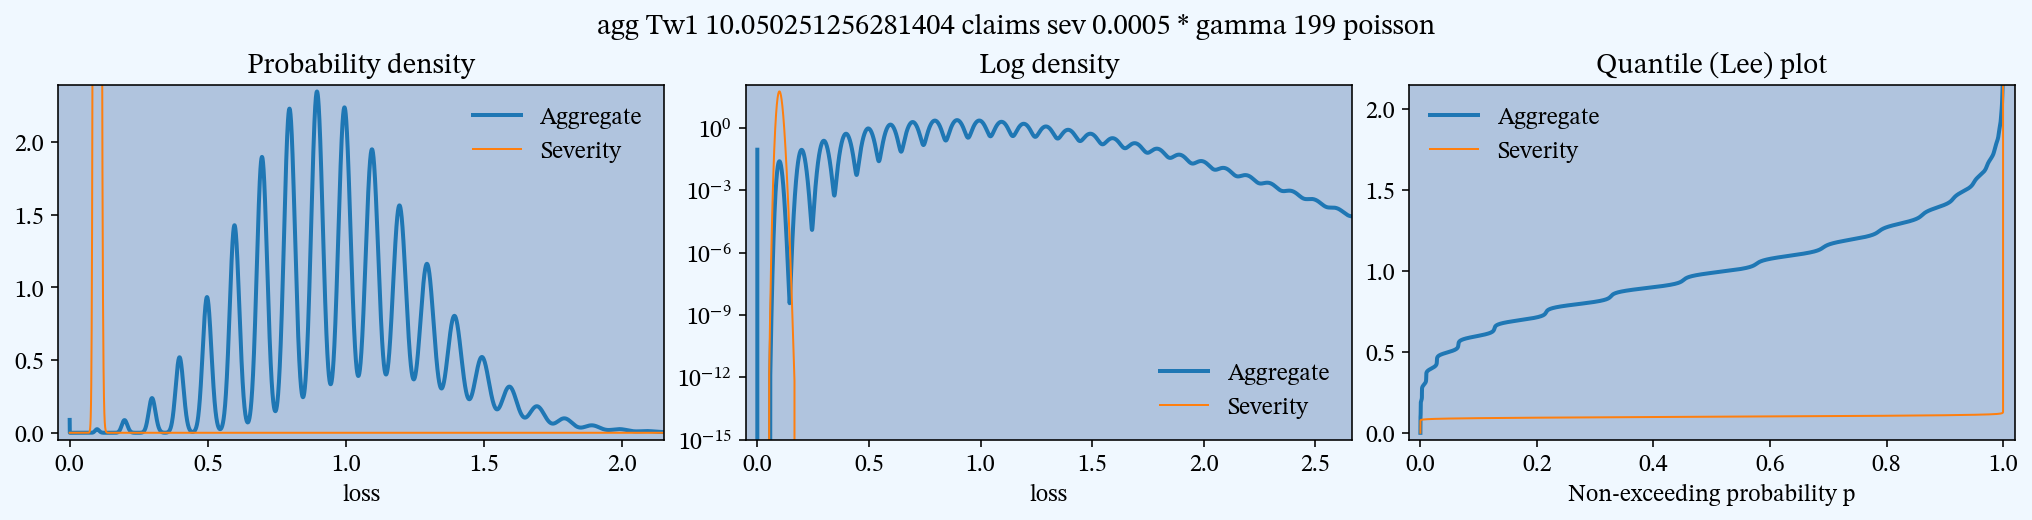

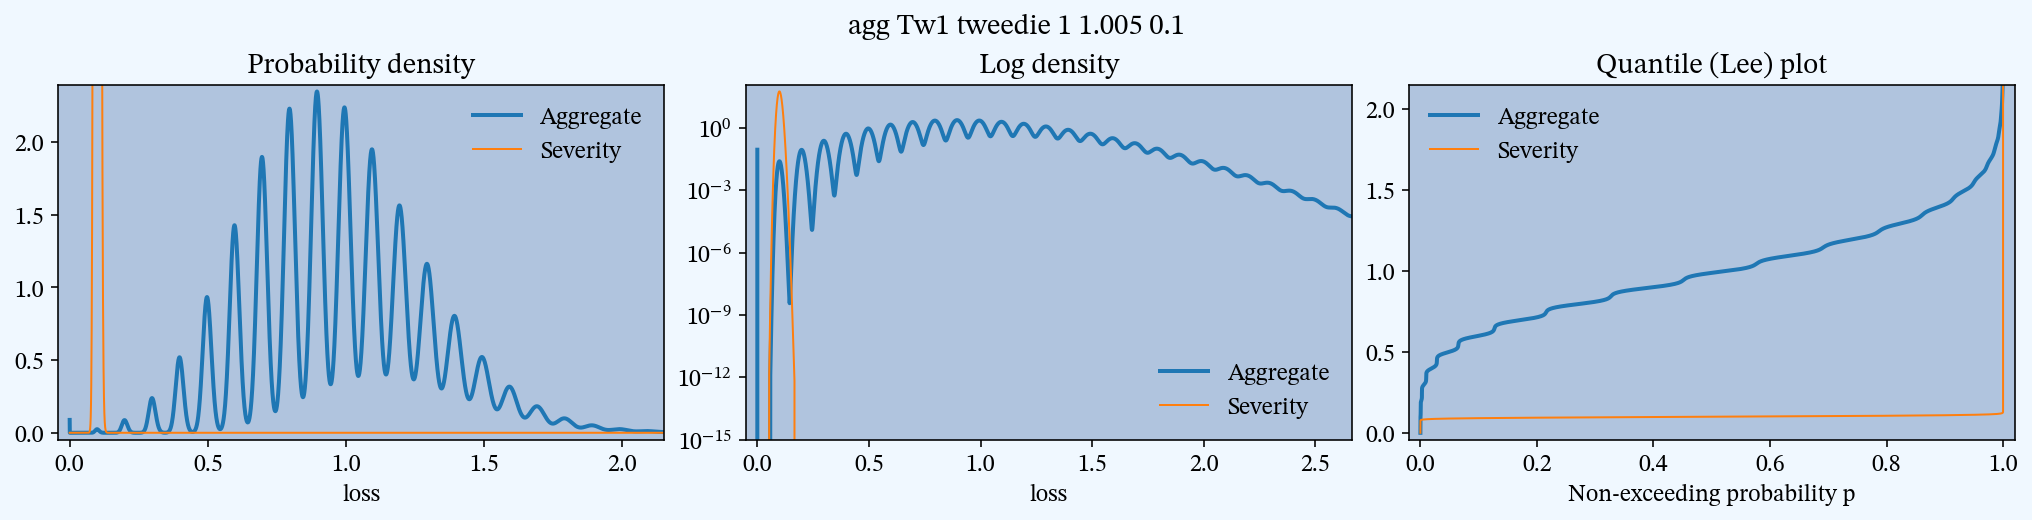

time: 3.09 s (started: 2022-10-25 20:57:32 +01:00)


In [5]:
program = f'''
agg Tw0 {λ} claims sev gamma {sev_m:.8g} cv {sev_cv} poisson
agg Tw1 {λ} claims sev {β:.4g} * gamma {α:.4g} poisson
agg Tw1 tweedie {μ} {p} {σ2}
'''
print(program)
tweedies = build(program)

pd.set_option("display.float_format", lambda x: f'{x:.8g}')

for a in tweedies:
    a.object.plot()
    plt.gcf().suptitle(a.program)
    display(a.object)

In [2]:
# from reproductive 
tweedie_convert(p=1.05, μ=2, σ2=5)

p            1.050
μ            2.000
σ^2          5.000
λ         406.710m
α           19.000
β            3.864
tw_cv        1.609
sev_m        4.918
sev_cv    229.416m
p0        665.837m
dtype: float64

time: 13.5 ms


In [3]:
# from additive
tweedie_convert(λ=0.406710033, m=4.917508388, cv=0.229415734)

p            1.050
μ            2.000
σ^2          5.000
λ         406.710m
α           19.000
β            3.864
tw_cv        1.609
sev_m        4.918
sev_cv    229.416m
p0        665.837m
dtype: float64

time: 7.36 ms


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,4.918,4.918,-75.657p,229.416m,229.416m,492.727n,458.831m
Freq,406.710m,,,1.568,,,1.568
Agg,2.000,2.000,-19.796u,1.609,1.609,-37.507u,1.689


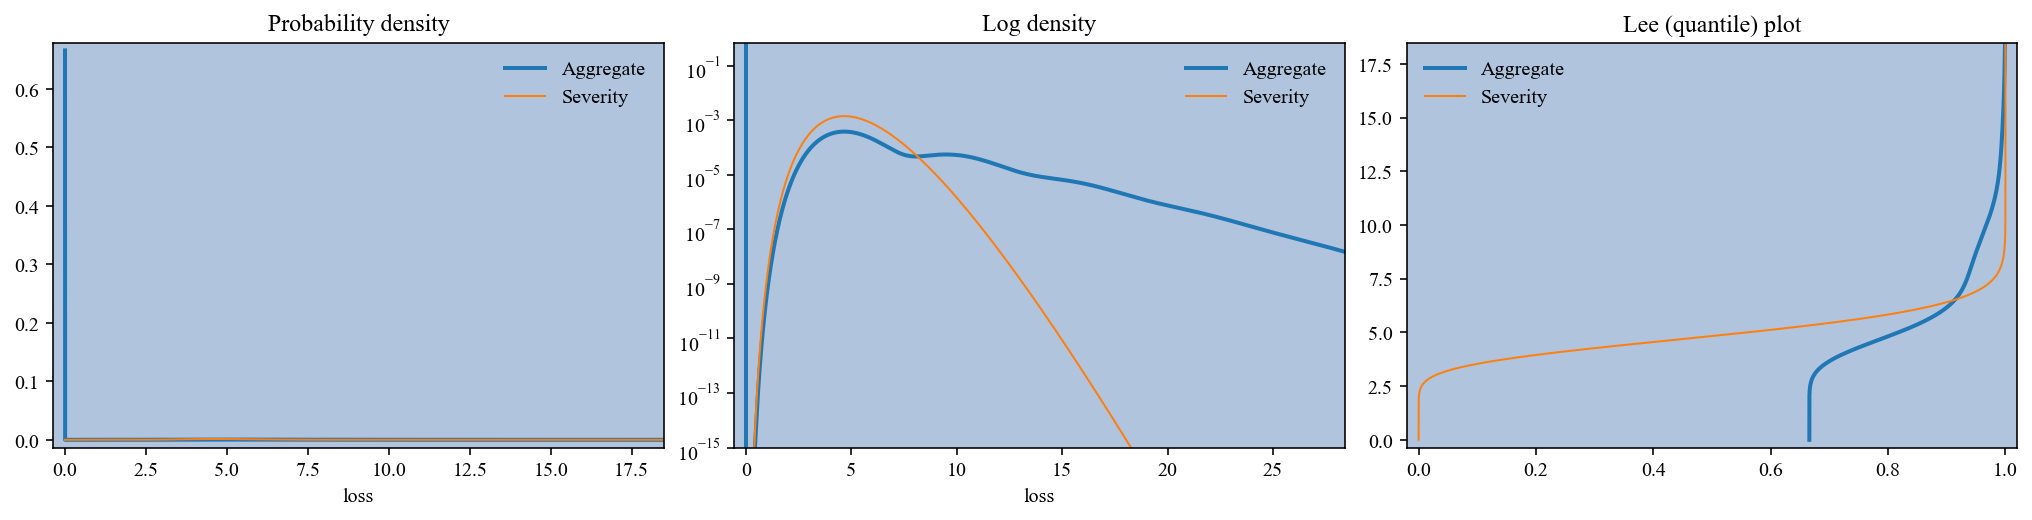

time: 2.2 s


In [4]:
# build Tweedie using reproductive parameters, p, mu, sigma^2
tw1 = build('agg TW1 tweedie 1.05 2 5', create_all=True)
tw1.plot()
tw1

In [5]:
tw1.spec

{'name': 'TW1',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 0.4067100332315139,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'gamma',
 'sev_a': 18.999999999999982,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0.2588162309603446,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'poisson',
 'freq_a': 0,
 'freq_b': 0,
 'agg_reins': None,
 'agg_kind': '',
 'note': 'Tw(p=1.05, μ=2.0, σ^2=5.0) --> CP(λ=0.406710, ga(α=19.0000, β=3.8637), scale=0.2588'}

time: 8.29 ms


In [6]:
tw1.cdf(0), np.exp(-.40671)

(array(   0.66584), 0.6658372551097528)

time: 2.9 ms


In [7]:
# spec shows conversion to compound distribution with gamma severity 
tw1.spec

{'name': 'TW1',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 0.4067100332315139,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'gamma',
 'sev_a': 18.999999999999982,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0.2588162309603446,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'poisson',
 'freq_a': 0,
 'freq_b': 0,
 'agg_reins': None,
 'agg_kind': '',
 'note': 'Tw(p=1.05, μ=2.0, σ^2=5.0) --> CP(λ=0.406710, ga(α=19.0000, β=3.8637), scale=0.2588'}

time: 6 ms


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,-153.433f,10.001m,10.064m,6.335m,20.001m
Freq,9.999,,,316.248m,,,316.248m
Agg,10.000,10.000,-54.469n,316.264m,316.264m,345.114n,316.296m


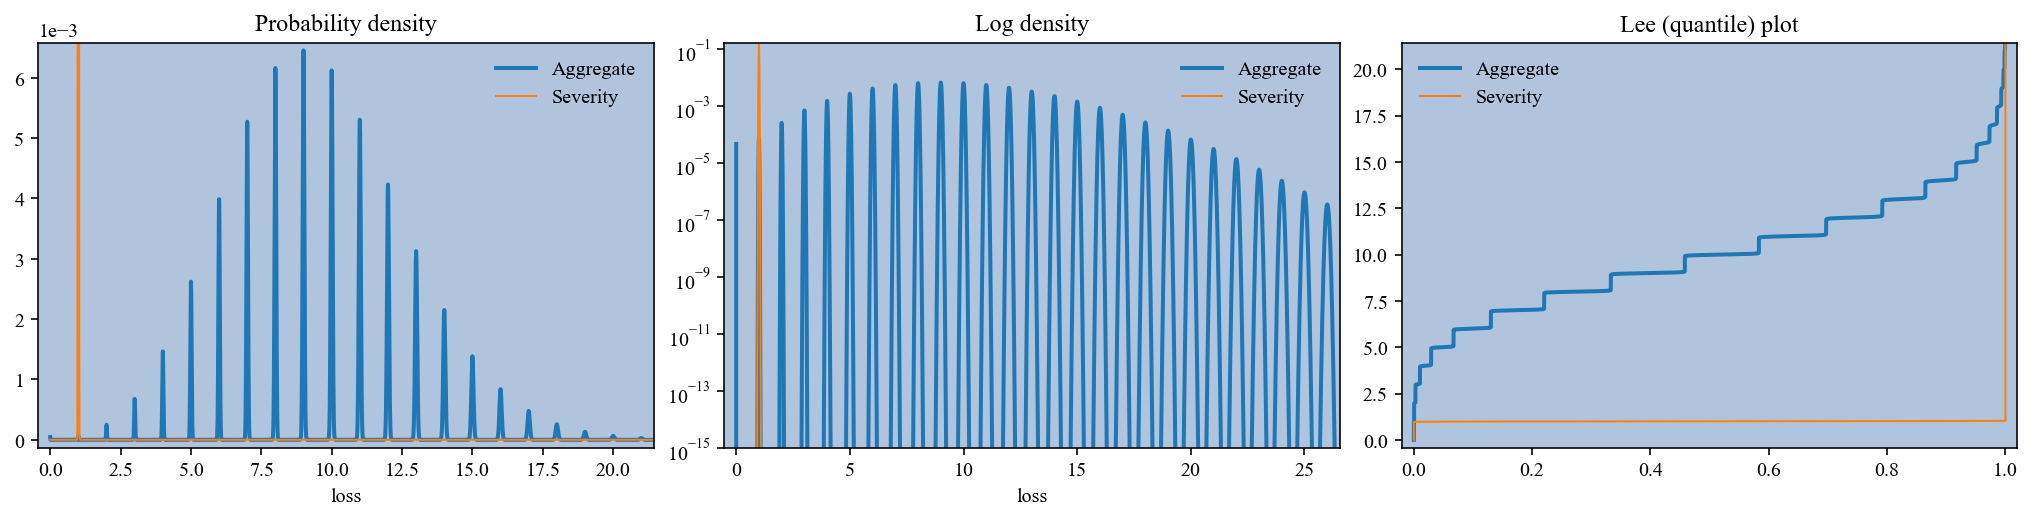

time: 1.46 s


In [8]:
# when p close to 1 degenerates into Poisson, here mean = 10, sigma2 = 1, so not overdispersed
tw2 = build('agg TW2 tweedie 1.0001 10 1', create_all=True)
tw2.plot()
tw2

In [ ]:
# gamma has mean 1 and very small CV, acts like degenerate distribution at 1
tweedie_convert(p=1.0001, μ=10, σ2=1)

p            1.000
μ           10.000
σ^2          1.000
λ            9.999
α           9.999k
β           9.998k
tw_cv     316.264m
sev_m        1.000
sev_cv     10.001m
p0         45.459u
dtype: float64

time: 6.4 ms


16:08.488|2907|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.00039908042080327716, message no message ->
16:08.489|2912|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^1 integral for convergence reasons
16:08.615|2907|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.00015926539834287923, message no message ->
16:08.616|2912|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^2 integral for convergence reasons
16:08.827|2907|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.0001270553165965757, message no message ->
16:08.828|2912|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^3 integral for convergence reasons


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,399.080u,397.735u,-3.371m,31.607,31.715,3.407m,63.092
Freq,25.058k,,,6.317m,,,6.317m
Agg,10.000,10.000,666.134a,199.770m,199.770m,-9.548f,398.568m


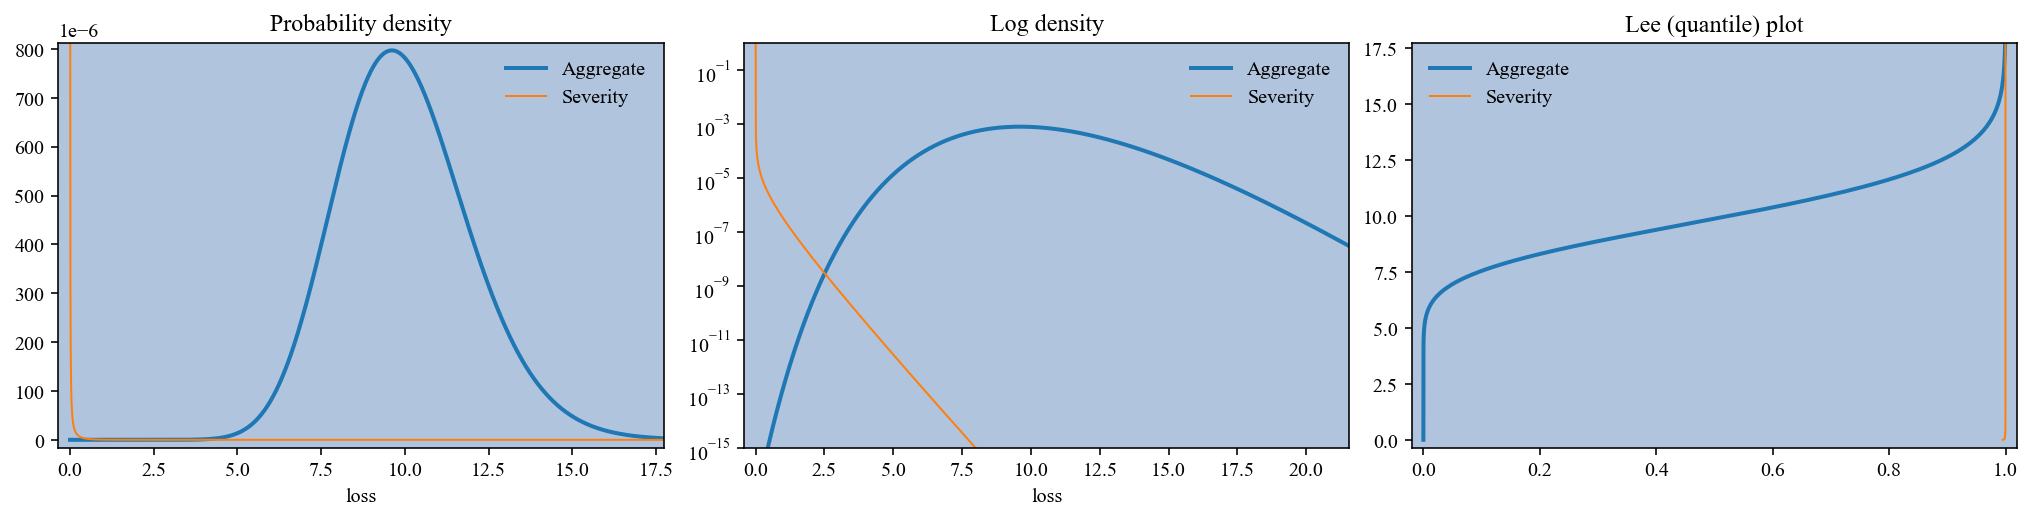

time: 2.41 s


In [10]:
# when p close to 2 degenerates into Gamma, here mean = 10, and sigma2=0.04
# variance of tweedie equals sigma2 mu^2, so CV = sigma = 0.2
# note: this is computed as an approximation
tw3 = build('agg TW3 tweedie 1.999 10 0.04', create_all=True, log2=16, bs=1/256)
tw3.plot()
tw3

In [11]:
tc = tweedie_convert(p=1.9999, μ=10, σ2=.04)
tc

p            2.000
μ           10.000
σ^2        40.000m
λ         250.058k
α         100.010u
β            2.501
tw_cv     199.977m
sev_m      39.991u
sev_cv      99.995
p0           0.000
dtype: float64

time: 10 ms


In [12]:
# build explicitly as a gamma
m, cv = tc['μ'], tc['tw_cv']
m, cv

(10.0, 0.19997697547449372)

time: 2.9 ms


In [13]:
g = build(f'sev g gamma {m} cv {cv}', create_all=True)

time: 6.92 ms


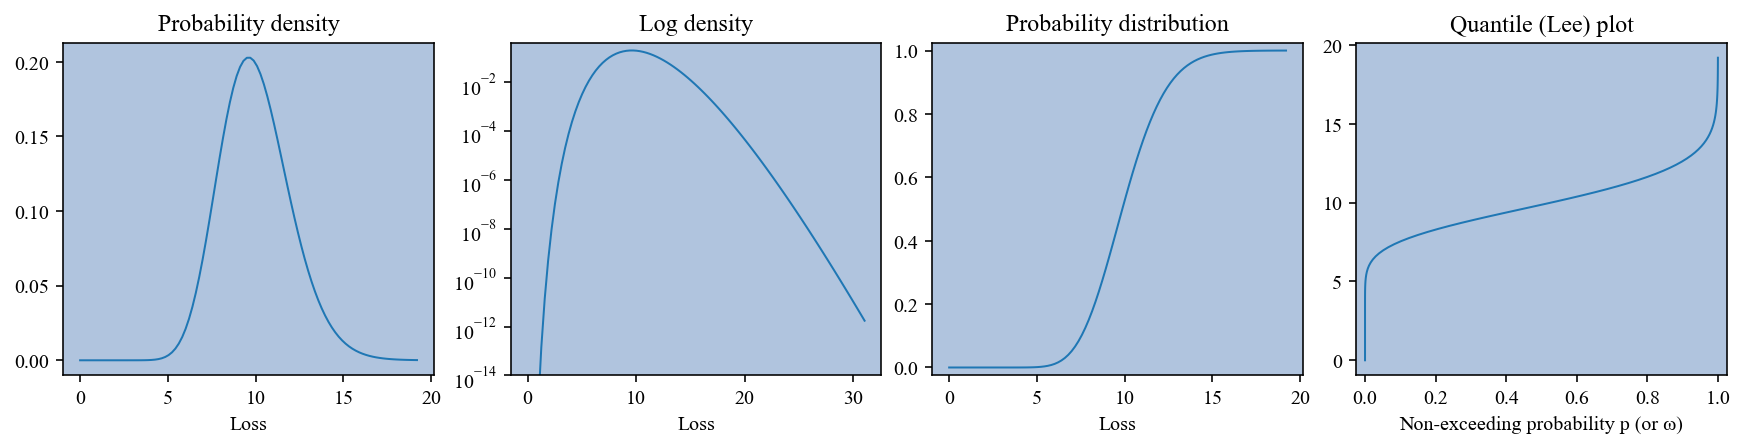

time: 664 ms


In [14]:
g.plot()

In [15]:
# or using shape and scale
sh = cv ** -2
sc = m / sh
sc, sh

(0.39990790719926267, 25.005757125520617)

time: 5.1 ms


In [16]:
g2 = build(f'sev g2 {sc} @ gamma {sh}')

time: 5.82 ms


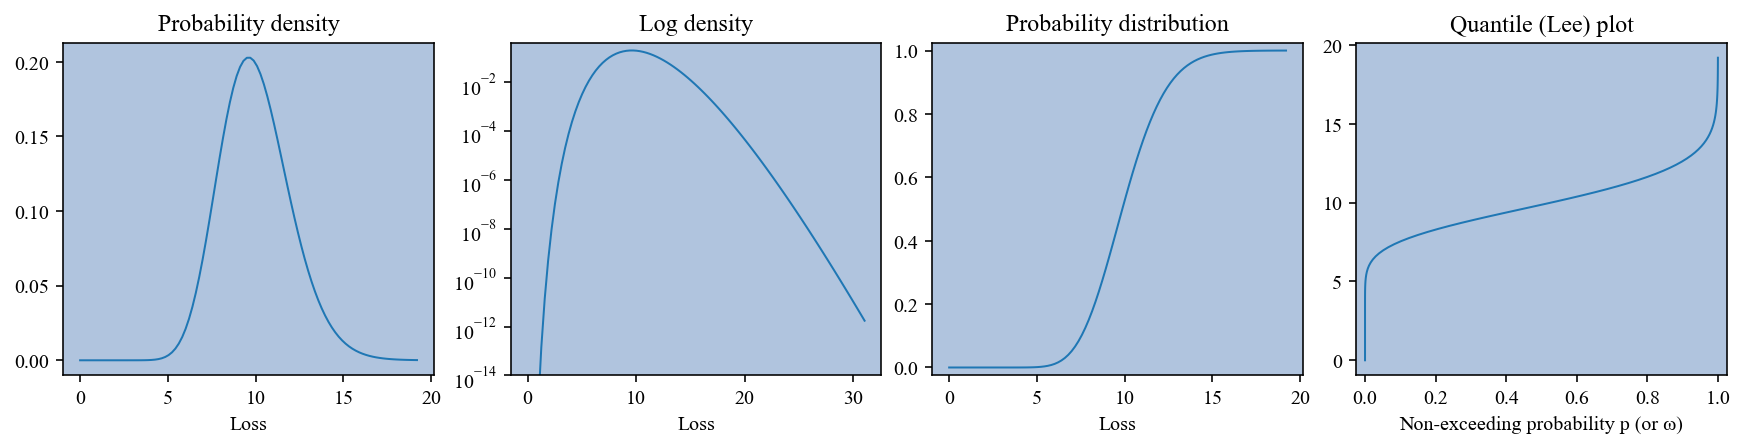

time: 937 ms


In [17]:
g2.plot()

In [18]:
g2.stats(), g.stats()

((array(        10), array(    3.9991)),
 (array(        10), array(    3.9991)))

time: 561 ms


## The Power Variance Exponential Family of Distributions 

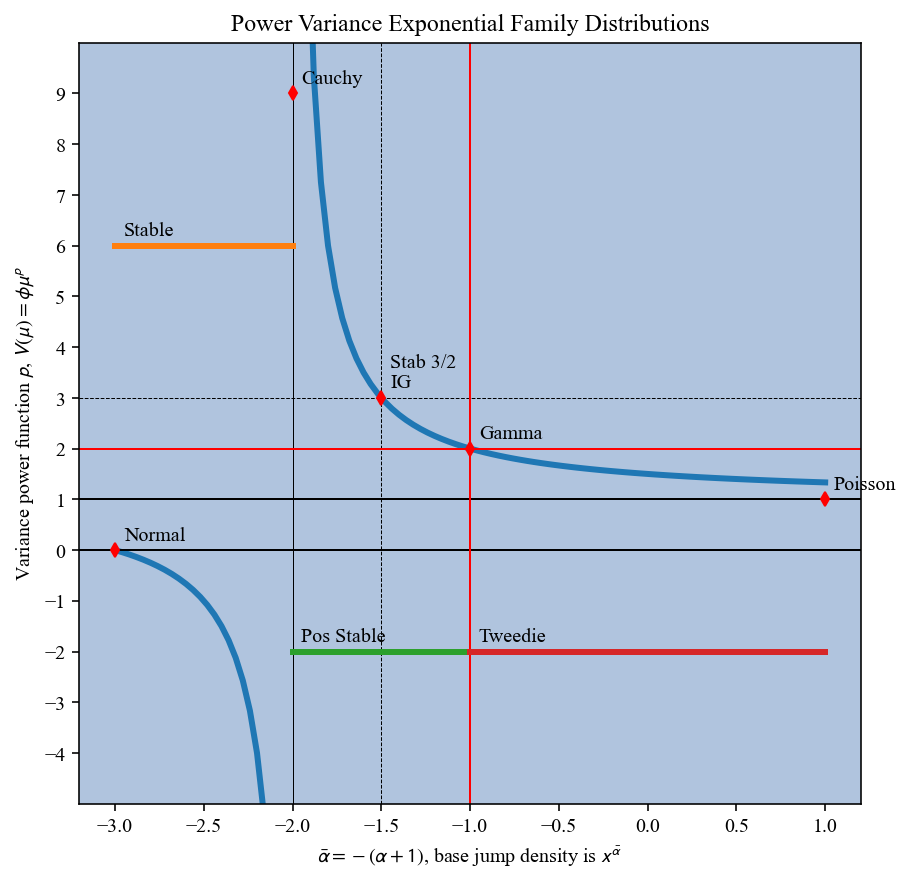

time: 379 ms


In [19]:
power_variance_family()

\
\
\
Created: July 16, 2022